In [185]:
import numpy as np
import mpl_scatter_density
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [186]:
from gadget.pygadget import Simulation


In [187]:
snapnum = 128

basedir = '/media/DATA/simulations/hog/media/gadget/run'
folder = '444_136254_DM_L12'
# folder = '443_33306_DM_L12'

folder2 = '425_136254_DM_L12'

sim_name = '{basedir:s}/{folder:s}/snapshot_{snapnum:03d}'
hname = '{basedir:s}/{folder:s}/halos/out_{snapnum:d}.list'

fname = sim_name.format(basedir=basedir, folder=folder, snapnum=snapnum)
fname2 = sim_name.format(basedir=basedir, folder=folder2, snapnum=snapnum)

h1_name = hname.format(basedir=basedir, folder=folder, snapnum=snapnum)
h2_name = hname.format(basedir=basedir, folder=folder2, snapnum=snapnum)

In [188]:
snap = Simulation(fname, multiple_files=True, pot=True)
snap2 = Simulation(fname2, multiple_files=True, pot=True)

In [189]:
pos = snap.read_block('pos', 'halo', iter_files=False, all_files=True)
bndry_pos = snap.read_block('pos', 'disk', iter_files=False, all_files=True)

pos2 = snap2.read_block('pos', 'halo', iter_files=False, all_files=True)
bndry_pos2 = snap2.read_block('pos', 'bndry', iter_files=False, all_files=True)

In [190]:
columns = ['hid', 'descid', 'mvir', 'vmax', 'vrms', 'rvir', 'rs', 'np', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'jx',
           'jy', 'jz','spin', 'rs_klypin', 'mvir_all', 'm200b', 'm200c', 'm500c', 'm2500c', 'xoff', 'voff',
           'spin_bullock', 'b_to_a', 'c_to_a', 'ax', 'ay', 'az', 'b_to_a_500c', 'pid',]


data = np.genfromtxt(h1_name, names=columns)

data2 = np.genfromtxt(h2_name, names=columns)

hid = data['mvir'].argmax()
hid2 = data2['mvir'].argmax()
rvir = data['rvir'][hid]

data = pd.DataFrame(data)
data2 = pd.DataFrame(data2)

print(rvir)
print(data2['rvir'][hid2])

178.207
179.561


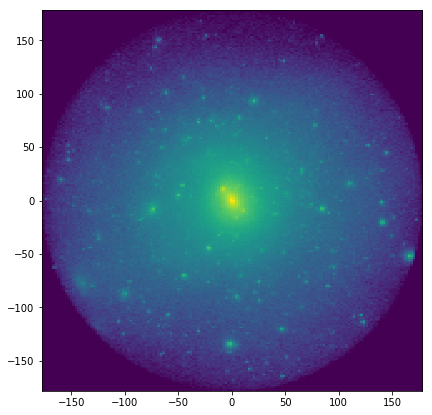

In [191]:


xc = data['x'][hid] * 1000
yc = data['y'][hid] * 1000
zc = data['z'][hid] * 1000

r = pos[['x', 'y', 'z']] - np.array([xc, yc, zc])

r = pos[['x', 'y', 'z']] - np.array([xc, yc, zc])
d2 = (r**2).sum(axis=1)
mask = d2 < (rtb*rvir)**2

x = r[mask]['x']
y = r[mask]['y']

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 2, 2, projection='scatter_density')
ax.scatter_density(x, y, norm=norm)
ax.set_aspect('equal')

In [192]:
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

rtb = 1

def compare_plot():
    fig = plt.figure(figsize=(15, 10))

    xc = data['x'][hid] * 1000
    yc = data['y'][hid] * 1000
    zc = data['z'][hid] * 1000

    r = pos[['x', 'y', 'z']] - np.array([xc, yc, zc])
    d2 = (r**2).sum(axis=1)
    mask = d2 < (rtb*rvir)**2

    x = r[mask]['x']
    y = r[mask]['y']

    ax = fig.add_subplot(1, 2, 1, projection='scatter_density')
    ax.scatter_density(x, y, norm=norm)
    ax.set_aspect('equal')

    ax.set_xlim(-rtb*rvir, rtb*rvir)
    ax.set_ylim(-rtb*rvir, rtb*rvir)

    ax.set_title('L7-->L12 2Rvir')

    #-----------------------------------------------------------

    xc = data2['x'][hid2] * 1000
    yc = data2['y'][hid2] * 1000
    zc = data2['z'][hid2] * 1000

    r = pos2[['x', 'y', 'z']] - np.array([xc, yc, zc])
    d2 = (r**2).sum(axis=1)
    mask = d2 < (rtb*rvir)**2

    x = r[mask]['x']
    y = r[mask]['y']


    ax = fig.add_subplot(1, 2, 2, projection='scatter_density')
    ax.scatter_density(x, y, norm=norm)
    ax.set_aspect('equal')

    ax.set_xlim(-rtb*rvir, rtb*rvir)
    ax.set_ylim(-rtb*rvir, rtb*rvir)

    ax.set_title('L8-->L12 10Rvir')


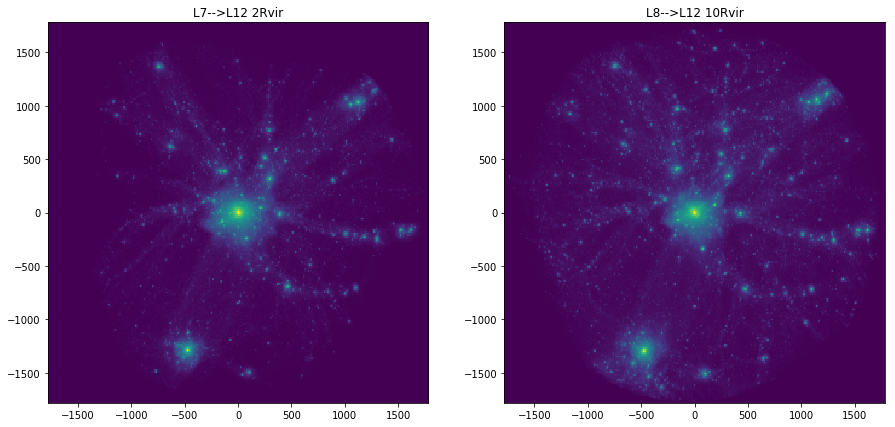

In [193]:
rtb = 10
compare_plot()

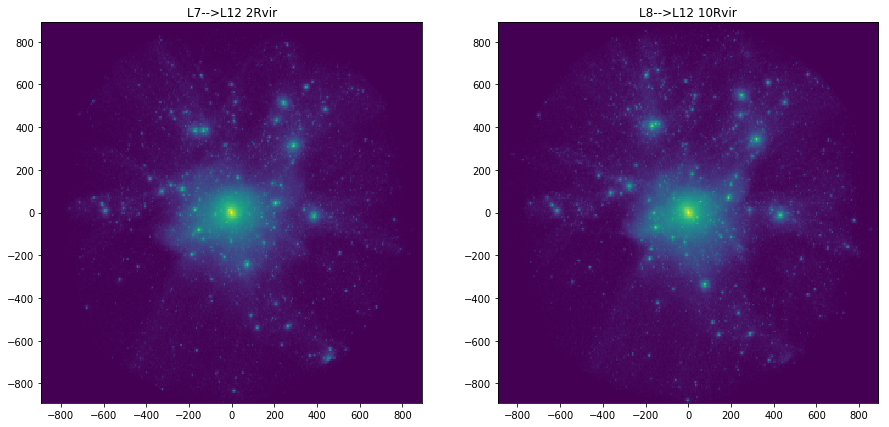

In [194]:
rtb = 5
compare_plot()

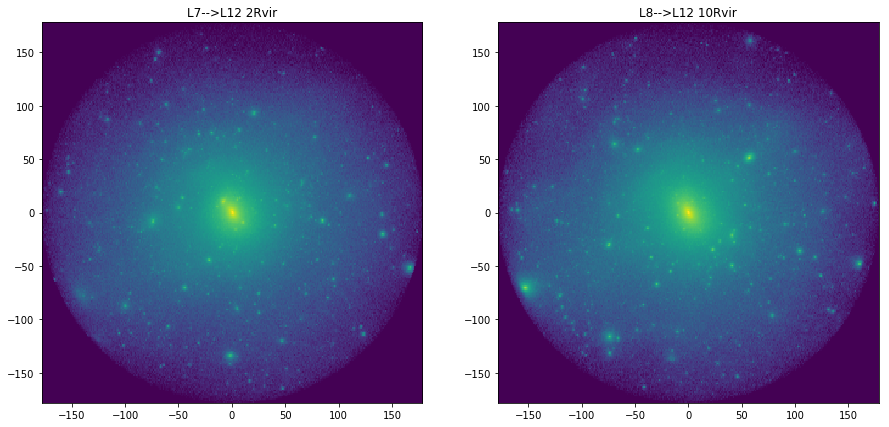

In [195]:
rtb = 1
compare_plot()

In [196]:
# compute bndry particles distance to halo centre

central = data.loc[hid]
central2 = data2.loc[hid2]

bndry_r = bndry_pos - central[['x', 'y', 'z']] * 1000
bndry_distance = np.sqrt((bndry_r**2).sum(axis=1))

bndry_r2 = bndry_pos2 - central2[['x', 'y', 'z']] * 1000
bndry_distance2 = np.sqrt((bndry_r2**2).sum(axis=1))

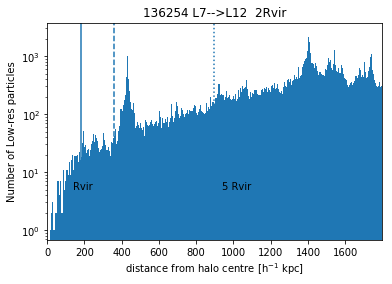

In [197]:
# Plot number of bndry particles as a function of halo distance

rvir = data2['rvir'][hid2]

bins = np.linspace(0, 10*rvir, 1000)

h = plt.hist(bndry_distance, bins=bins)

plt.axvline(rvir, linestyle='-')
plt.axvline(2*rvir, linestyle='--')
plt.axvline(5*rvir, linestyle=':')

plt.yscale('log')

plt.xlim(0, 10*rvir)

# set labels
text_margin = 40
text_y = 5
rotation = 0
plt.text(rvir-text_margin, text_y, 'Rvir', rotation=rotation)
plt.text(5*rvir+text_margin, text_y, '5 Rvir', rotation=rotation)

plt.title('136254 L7-->L12  2Rvir')
# plt.title('33306 L7-->L12  2Rvir')

plt.ylabel(r'Number of Low-res particles')
plt.xlabel(r'distance from halo centre [h$^{-1}$ kpc]')

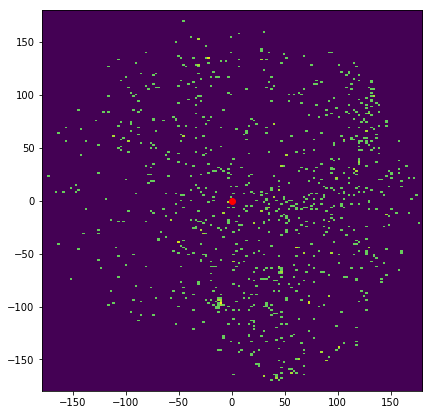

In [198]:
fig = plt.figure(figsize=(15, 10))

rtb=1

xc = data['x'][hid] * 1000
yc = data['y'][hid] * 1000
zc = data['z'][hid] * 1000

r = bndry_pos[['x', 'y', 'z']] - np.array([xc, yc, zc])
d2 = (r**2).sum(axis=1)
mask = d2 < (rtb*rvir)**2

x = r[mask]['x']
y = r[mask]['y']

ax = fig.add_subplot(1, 2, 1, projection='scatter_density')
ax.scatter_density(x, y, norm=norm)

ax.set_xlim(-rtb*rvir, rtb*rvir)
ax.set_ylim(-rtb*rvir, rtb*rvir)

ax.scatter(0, 0, c='r')

ax.set_aspect('equal')

In [199]:
len(bndry_pos2)

17677808

In [200]:
snap.particle_total_numbers

{'bndry': 2093027,
 'buldge': 192541,
 'disk': 391624,
 'gas': 0,
 'halo': 10910208,
 'stars': 0}